<a href="https://colab.research.google.com/github/CodingAya/Pokemon-Speed-Prediction/blob/main/Pokemon_Speed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 7.01MB/s]
Archive:  pokemon.zip
replace Pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Pokemon.csv             


In [5]:
import pandas as pd
original_df = pd.read_csv('Pokemon.csv')
original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
selected_df= original_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
selected_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [7]:
shuffled_df= selected_df.sample(frac=1)
shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
598,120,100,85,30,85,45
518,75,95,67,125,95,83
280,50,70,50,50,50,40
232,80,185,115,40,105,75
707,100,150,120,120,100,90


In [8]:
train_df= shuffled_df[:500]
val_df= shuffled_df[500:650]
test_df= shuffled_df[650:]

x_train, y_train= train_df.to_numpy()[:,: -1], train_df.to_numpy()[:,-1]
x_val, y_val= val_df.to_numpy()[:,: -1], val_df.to_numpy()[:,-1]
x_test, y_test= test_df.to_numpy()[:,: -1], test_df.to_numpy()[:,-1]

(x_train.shape, y_train.shape),(x_val.shape, y_val.shape),(x_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f378b829510>,
      dtype=object)

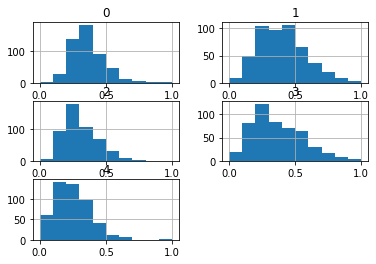

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(x_train)
x_train_scaled, x_val_scaled, x_test_scaled = scaler.transform(x_train), scaler.transform(x_val), scaler.transform(x_test)
pd.DataFrame(x_train_scaled).hist()


In [10]:
from sklearn.metrics import mean_absolute_error
average_speed = y_train.mean()
mean_absolute_error(y_val, [average_speed]*len(y_val))

21.270533333333333

In [11]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression().fit(x_train,y_train)
mean_absolute_error(y_val, linear_model.predict(x_val))

17.621298884988967

In [12]:
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor().fit(x_train, y_train)
mean_absolute_error(y_val, random_forest.predict(x_val))

17.965433333333333

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 1576.2115 - mean_absolute_error: 30.6341 - val_loss: 1334.3270 - val_mean_absolute_error: 26.9014
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1231.2990 - mean_absolute_error: 27.2512 - val_loss: 1292.6946 - val_mean_absolute_error: 26.4761
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 1179.4685 - mean_absolute_error: 26.5625 - val_loss: 1220.9222 - val_mean_absolute_error: 25.7576
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1125.0312 - mean_absolute_error: 26.1456 - val_loss: 1171.8937 - val_mean_absolute_error: 25.3632
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1072.7645 - mean_absolute_error: 25.6911 - val_loss: 1117.8027 - val_mean_absolute_error: 24.8589
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 1032.6781 - mean_absolute_error: 25.2000 - val_loss: 1065.7738 - val_me

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 2731.5706 - mean_absolute_error: 40.8213 - val_loss: 857.7029 - val_mean_absolute_error: 24.0790
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 869.0101 - mean_absolute_error: 23.5403 - val_loss: 635.3154 - val_mean_absolute_error: 19.9356
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 711.6330 - mean_absolute_error: 21.0116 - val_loss: 644.1899 - val_mean_absolute_error: 19.5686
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 661.4465 - mean_absolute_error: 20.2094 - val_loss: 603.5383 - val_mean_absolute_error: 19.2178
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 647.5394 - mean_absolute_error: 19.9854 - val_loss: 610.5114 - val_mean_absolute_error: 20.0642
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 659.9133 - mean_absolute_error: 20.2721 - val_loss: 596.4033 - val_mean_absolute

In [18]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                192       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [20]:
mean_absolute_error(y_test, linear_model.predict(x_test))

19.999047875909557